### Project: Facebook Marketing Analysis using Machine Learning
### Name: Taweepong Hirikul
### References: 
- https://archive.ics.uci.edu/
- https://scikit-learn.org/
- https://stackoverflow.com/
- https://machinelearningmastery.com
- https://towardsdatascience.com
- https://www.askpython.com
- https://data36.com
- https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand

# Introduction

Due to the rapid growth of technology, there has been a huge development and growth in the industry. In addition, technologies are used more efficiently. Social media is an integral part of today's technology and becoming part of our daily lives. The use of social media is growing exponentially. One of them is Facebook, which is one of the social media that have the highest number of users in the world. There are many different uses for Facebook. such as sharing a moment, communicating, Searching for information and including news updates as well. In addition, organizations have adapted Facebook to communicate between organizations and customers. in terms of promotion, advertisement and selling products and services of the organization.

Therefore, to use Facebook in the most efficient way, it is necessary to provide information about the needs of consumers on Facebook, how customers use Facebook, What kind of Facebook posts are there to respond to, and how to respond. if these data were analyzed we can offer services and promotions and corporate information that genuinely meet the needs of consumers.


### Problem
Organizations would like to know how the organization needs to meet the needs of their customers. If an organization wants to promote a campaign with Facebook and Facebook's users will participate and know the details of the campaign thoroughly. Users will want to share, comment, and interact with others on Facebook posts.


### Dataset
We decided to implement a learning system for selling approaches and activities on Facebook. We found a suitable dataset online, which contains a dataset of 7,050 records that’s data cover the number of reactions, shares, and comments. Including the type of Facebook post and the type of reactions.



### Summary of steps of machine learning pipeline.
The steps for analyzing this dataset, We will start will cleansing null value and drop unneeded rows and columns. then will transform the data before we implement a machine learning model. the last step, we will produce and choose the best machine learning model to get the result.

# STEP 1: Library import and data loading

In [1]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

In [2]:
#load dataset
df_ori = pd.read_csv("dataset/Live_20210128.csv")
df_ori.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


## Feature Observation
This dataset has 15 features that contain detail of consumer engagement. Below is the meaning of each feature.

|Feature           | Meaning 
|:-----------------| :-----------------
|status_id         | status id of Facebook's post
|status_type       | Type of Facebook's post e.g., Video, photo, link, status
|status_published  | Date and Time
|num_reactions     | Total number of reactions
|num_comments      | Total number of comments
|num_shares        | Total number of shares
|num_likes         | Total number of like reaction type
|num_loves         | Total number of love reaction type
|num_wows          | Total number of wow reaction type
|num_hahas         | Total number of haha reaction type
|num_sads          | Total number of sad reaction type
|num_angrys        | Total number of angry reaction type
|Column1           | Null
|Column2           | Null
|Column3           | Null


# STEP 2: Process the data
We will drop unneeded columns and transform the data.

In [3]:
#check data type
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

In [4]:
df_ori.shape

(7050, 16)

In [5]:
#check null
df_ori.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

## 2.1 drop null value columns

In [6]:
df_ori.drop(columns=["Column1","Column2","Column3","Column4"],inplace=True)
df_ori.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [7]:
df_ori["status_type"].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

## 2.2 convert status_type column to datetime type

In [8]:
df_ori['status_published'] = pd.to_datetime(df_ori['status_published'])
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   status_id         7050 non-null   int64         
 1   status_type       7050 non-null   object        
 2   status_published  7050 non-null   datetime64[ns]
 3   num_reactions     7050 non-null   int64         
 4   num_comments      7050 non-null   int64         
 5   num_shares        7050 non-null   int64         
 6   num_likes         7050 non-null   int64         
 7   num_loves         7050 non-null   int64         
 8   num_wows          7050 non-null   int64         
 9   num_hahas         7050 non-null   int64         
 10  num_sads          7050 non-null   int64         
 11  num_angrys        7050 non-null   int64         
dtypes: datetime64[ns](1), int64(10), object(1)
memory usage: 661.1+ KB


## 2.3 create hour column from data in status_published column

In [9]:
df_ori["hour"] = df_ori.status_published.map(lambda x : x.hour)

In [10]:
df = df_ori.copy()

In [11]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,hour
0,1,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,6
1,2,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,22
2,3,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,6
3,4,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,2
4,5,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,3


## 2.4 Data transformation: dummy feature

In [12]:
#create dummy value for the status_type and join with the original data
dummy_features =  pd.get_dummies(df.status_type, drop_first=True, prefix='type')
df = pd.concat([df, dummy_features], axis=1)

df.drop(columns=["status_type","status_id","status_published"],inplace=True)
df

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,hour,type_photo,type_status,type_video
0,529,512,262,432,92,3,1,1,0,6,0,0,1
1,150,0,0,150,0,0,0,0,0,22,1,0,0
2,227,236,57,204,21,1,1,0,0,6,0,0,1
3,111,0,0,111,0,0,0,0,0,2,1,0,0
4,213,0,0,204,9,0,0,0,0,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0,0,0,2,1,0,0
7046,16,0,0,14,1,0,1,0,0,11,1,0,0
7047,2,0,0,1,1,0,0,0,0,23,1,0,0
7048,351,12,22,349,2,0,0,0,0,0,1,0,0


# 3. Find out the summary statistics of the dataset using describe()

In [13]:
df.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,hour,type_photo,type_status,type_video
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,7.829504,0.608227,0.051773,0.331064
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,6.886893,0.488181,0.221584,0.470629
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000
95%,1239.650000,1210.650000,260.100000,1160.100000,77.000000,4.000000,4.000000,1.000000,1.000000,23.000000,1.000000,1.000000,1.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,23.000000,1.000000,1.000000,1.000000


# 4. Produce the correlation of the dataset.

In [14]:
df.corr()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,hour,type_photo,type_status,type_video
num_reactions,1.000000,0.150843,0.250723,0.994923,0.305003,0.267752,0.176028,0.075138,0.124326,0.017016,-0.131515,0.105402,0.081046
num_comments,0.150843,1.000000,0.640637,0.101687,0.521223,0.162394,0.325048,0.236453,0.225184,0.002515,-0.291846,-0.049413,0.330662
num_shares,0.250723,0.640637,1.000000,0.172492,0.820000,0.407628,0.399826,0.199970,0.312513,-0.050917,-0.354780,-0.066524,0.404473
num_likes,0.994923,0.101687,0.172492,1.000000,0.209308,0.207800,0.120784,0.052169,0.087431,0.021375,-0.100537,0.114631,0.043784
num_loves,0.305003,0.521223,0.820000,0.209308,1.000000,0.508798,0.507830,0.207600,0.371001,-0.042705,-0.351741,-0.065283,0.401499
num_wows,0.267752,0.162394,0.407628,0.207800,0.508798,1.000000,0.287756,0.086503,0.183087,-0.002816,-0.086409,-0.003129,0.093498
num_hahas,0.176028,0.325048,0.399826,0.120784,0.507830,0.287756,1.000000,0.141421,0.211910,-0.006964,-0.159237,-0.034656,0.184682
num_sads,0.075138,0.236453,0.199970,0.052169,0.207600,0.086503,0.141421,1.000000,0.142072,0.020918,-0.078953,0.020866,0.074971
num_angrys,0.124326,0.225184,0.312513,0.087431,0.371001,0.183087,0.211910,0.142072,1.000000,-0.012327,-0.115695,-0.028465,0.136370
hour,0.017016,0.002515,-0.050917,0.021375,-0.042705,-0.002816,-0.006964,0.020918,-0.012327,1.000000,0.039710,0.018335,-0.058872


# 5. EDA

As a reminder, we are iinteresting in number of shares and comment because we need to promote the campaing which need Facebook's users have reaction, share and comment with their friends and other participates. 


## 5.1 Univariate data analysis
In univariate analysis, we try to see the distribution of some interesting feature. We use histogram, distplot, boxplot for this purpose

In [15]:
df2 = df.copy()

### 5.1.1 we decide to keep the data points whose reactions, comments and shares value is between 5% and 95%

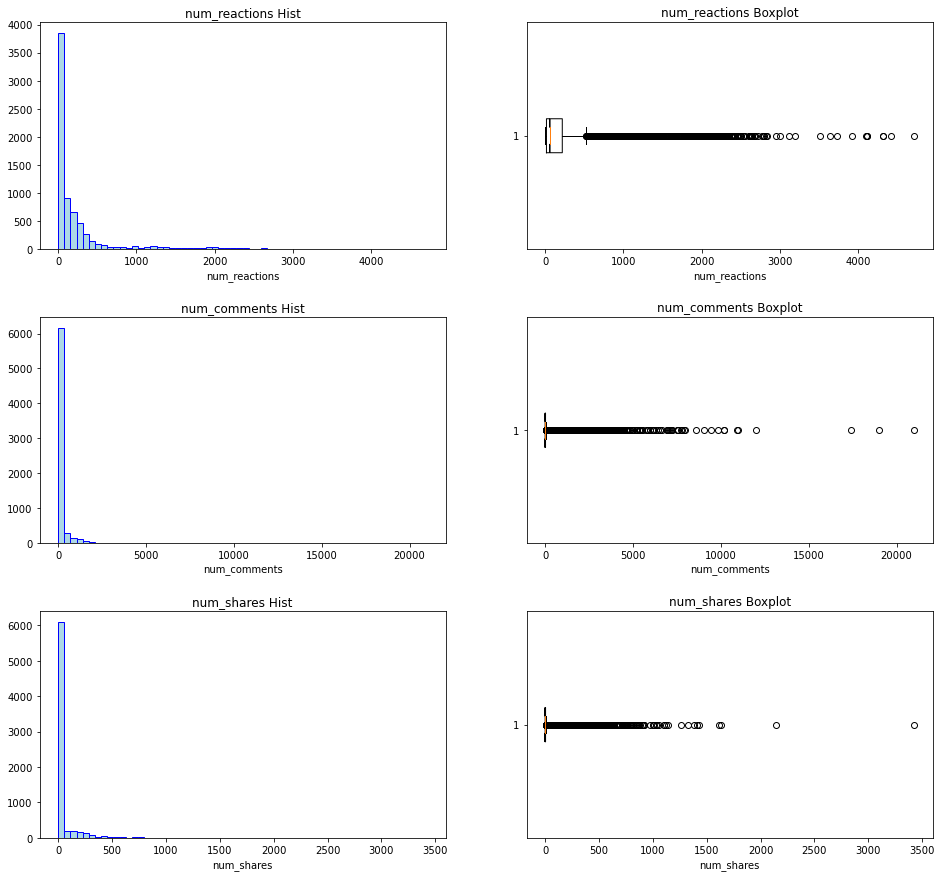

In [16]:
plt.figure(figsize=(16,15))
plt.subplot(3,2,1)
plt.title('num_reactions Hist')
plt.xlabel('num_reactions')
histPrice = plt.hist(df2.num_reactions,bins=60, color='lightblue', edgecolor='blue')

plt.subplot(3,2,2)
plt.title('num_reactions Boxplot')
boxplotPrice = plt.boxplot(df2.num_reactions,notch=True, vert=False)
plt.xlabel('num_reactions')

plt.subplot(3,2,3)
plt.title('num_comments Hist')
plt.xlabel('num_comments')
histPrice = plt.hist(df2.num_comments,bins=60, color='lightblue', edgecolor='blue')

plt.subplot(3,2,4)
plt.title('num_comments Boxplot')
boxplotPrice = plt.boxplot(df2.num_comments,notch=True, vert=False)
plt.xlabel('num_comments')

plt.subplot(3,2,5)
plt.title('num_shares Hist')
plt.xlabel('num_shares')
histPrice = plt.hist(df2.num_shares,bins=60, color='lightblue', edgecolor='blue')

plt.subplot(3,2,6)
plt.title('num_shares Boxplot')
boxplotPrice = plt.boxplot(df2.num_shares,notch=True, vert=False)
plt.xlabel('num_shares')

plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

We found some outliners in this dataset. we decided to remove it.

In [17]:
#removed some outliers
df2 = df2.loc[(df2.num_reactions > 0) & (df2.num_reactions <= 1300)]
df2 = df2.loc[(df2.num_comments >0) & (df2.num_comments <= 1300)]
df2 = df2.loc[(df2.num_shares >0) & (df2.num_shares <= 300)]

### 5.1.2 histogram and boxplot (after removed some outliers)

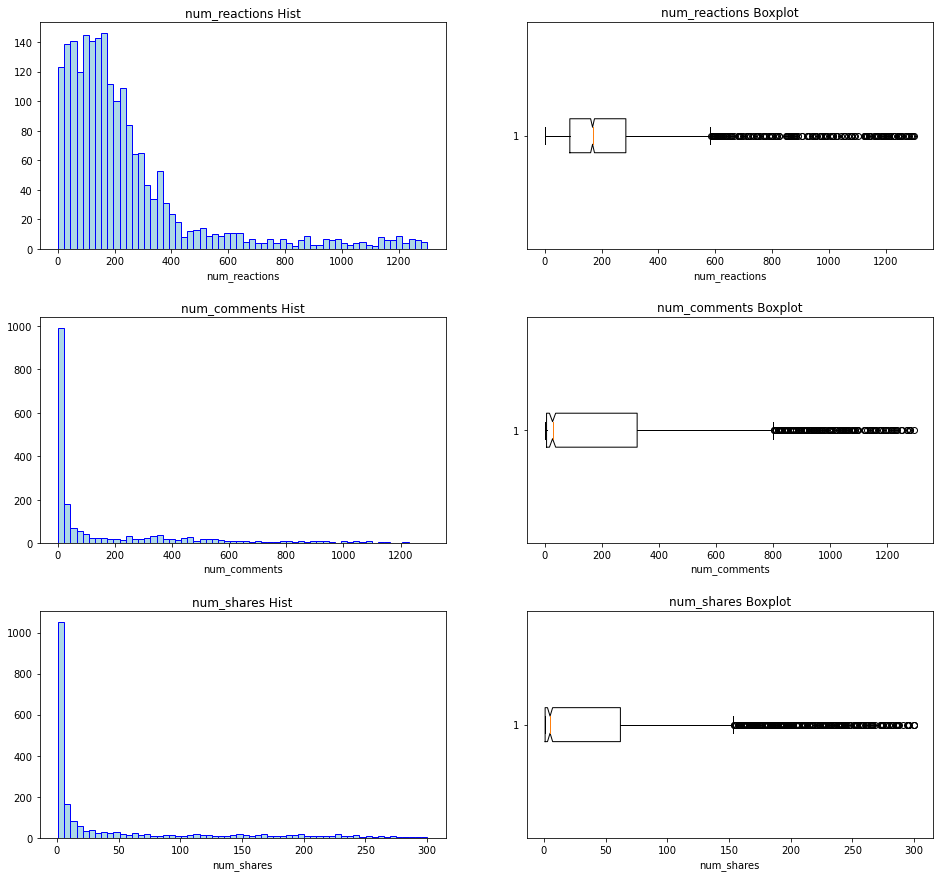

In [18]:
plt.figure(figsize=(16,15))
plt.subplot(3,2,1)
plt.title('num_reactions Hist')
plt.xlabel('num_reactions')
histPrice = plt.hist(df2.num_reactions,bins=60, color='lightblue', edgecolor='blue')

plt.subplot(3,2,2)
plt.title('num_reactions Boxplot')
boxplotPrice = plt.boxplot(df2.num_reactions,notch=True, vert=False)
plt.xlabel('num_reactions')

plt.subplot(3,2,3)
plt.title('num_comments Hist')
plt.xlabel('num_comments')
histPrice = plt.hist(df2.num_comments,bins=60, color='lightblue', edgecolor='blue')

plt.subplot(3,2,4)
plt.title('num_comments Boxplot')
boxplotPrice = plt.boxplot(df2.num_comments,notch=True, vert=False)
plt.xlabel('num_comments')

plt.subplot(3,2,5)
plt.title('num_shares Hist')
plt.xlabel('num_shares')
histPrice = plt.hist(df2.num_shares,bins=60, color='lightblue', edgecolor='blue')

plt.subplot(3,2,6)
plt.title('num_shares Boxplot')
boxplotPrice = plt.boxplot(df2.num_shares,notch=True, vert=False)
plt.xlabel('num_shares')

plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

### 5.1.3 distplot for interesting feature

/Users/maxllxam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='num_shares', ylabel='Density'>

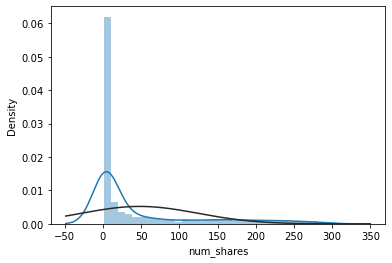

In [19]:
import seaborn as sns
from scipy.stats import norm
sns.distplot(df2.num_shares, fit=norm)

We can see the num_shares distribution (after we removed some outliers). However, the most of share value is close to 0 which means the most people need to share only the exactly they like only. 

/Users/maxllxam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='num_comments', ylabel='Density'>

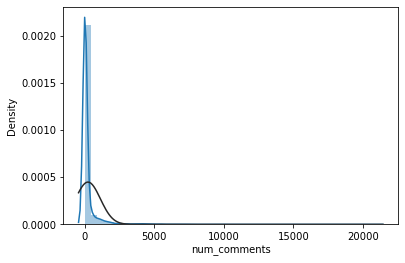

In [20]:
sns.distplot(df.num_comments, fit=norm)

We can see the num_comments distribution (after we removed some outliers). This is similar to num_shares which means the most people need to share and comment only the exactly they like only.

## 5.2 Multivariate Analysis
### 5.2.1 we try to find the relationship and correlation between two or more features.

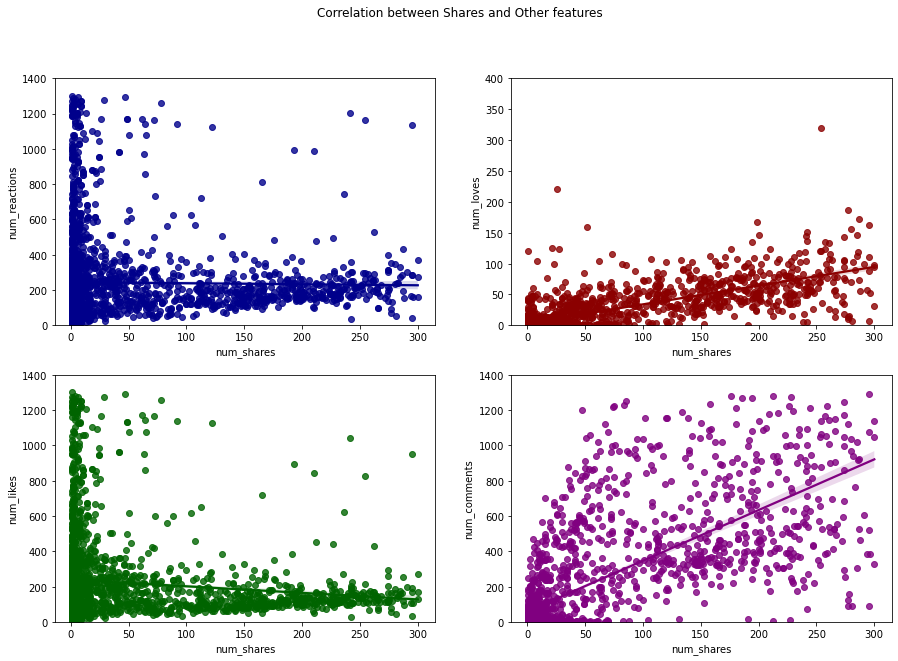

In [21]:
fig, axs = plt.subplots(2,2, figsize=(15,10))
fig.suptitle('Correlation between Shares and Other features')
p1 = sns.regplot(x='num_shares', y='num_reactions', color='darkblue', marker = "o", data=df2, ax=axs[0,0])
p1.set(ylim=(0, 1400), xlabel=("num_shares"), ylabel=("num_reactions"))
p2 = sns.regplot(x='num_shares', y='num_loves', color='darkred', marker = "o", data=df2, ax=axs[0,1])
p2.set(ylim=(0, 400), xlabel=("num_shares"), ylabel=("num_loves"))
p2 = sns.regplot(x='num_shares', y='num_likes', color='darkgreen', marker = "o", data=df2, ax=axs[1,0])
p2.set(ylim=(0, 1400), xlabel=("num_shares"), ylabel=("num_likes"))
p2 = sns.regplot(x='num_shares', y='num_comments', color='purple', marker = "o", data=df2, ax=axs[1,1])
p2.set(ylim=(0, 1400), xlabel=("num_shares"), ylabel=("num_comments"))
plt.show()

We found num_shares is a positive correlation with num_loves, num_comments and num_reactions. So, num_shares is negative correlation with num_likes.

### 5.2.2 the correlation of the features and plot the heatmap of the correlation.

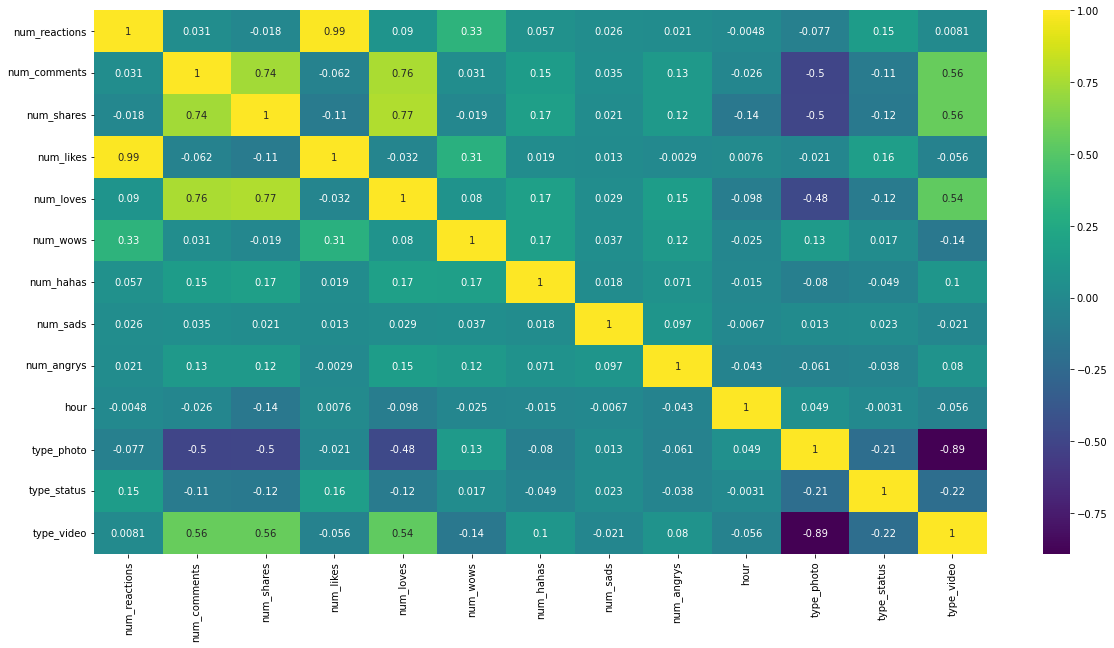

In [22]:
corr = df2.corr()
plt.subplots(figsize=(20,10))
heat = sns.heatmap(corr, annot=True,  cmap="viridis")
plt.show()

### Feature Observation and Hypothesis

We can see on this heatmap whether the correlation between num_reactions and num_like is the highest(0.99). num_shares with num_loves (0.77), num_comments with num_loves (0.76) and num_shares with num_comments (0.74). type_video and type_photo is the most negative correlation(0.89).

We can see that "like" is the most Facebook users react to the post. the number of shares (we are interesting) is correlated with the number of comments and number of love reactions. 

And this heatmap shows that the user commented on a Facebook post. Users will share with their friends and comment on that post to participate with each other in the post as well. Also, if users respond with a love reaction will make users want to share and comment on that post even more. Therefore, the Facebook post should focus on the posts that users will respond to with a love reaction in order for users to share and comment on that post in the most efficient way.

However, the response of users to video posts is higher than images. This shows that most of the users like to comment and share more video-type posts.

### 5.2.3 Looking at the correclation between features using pairplot

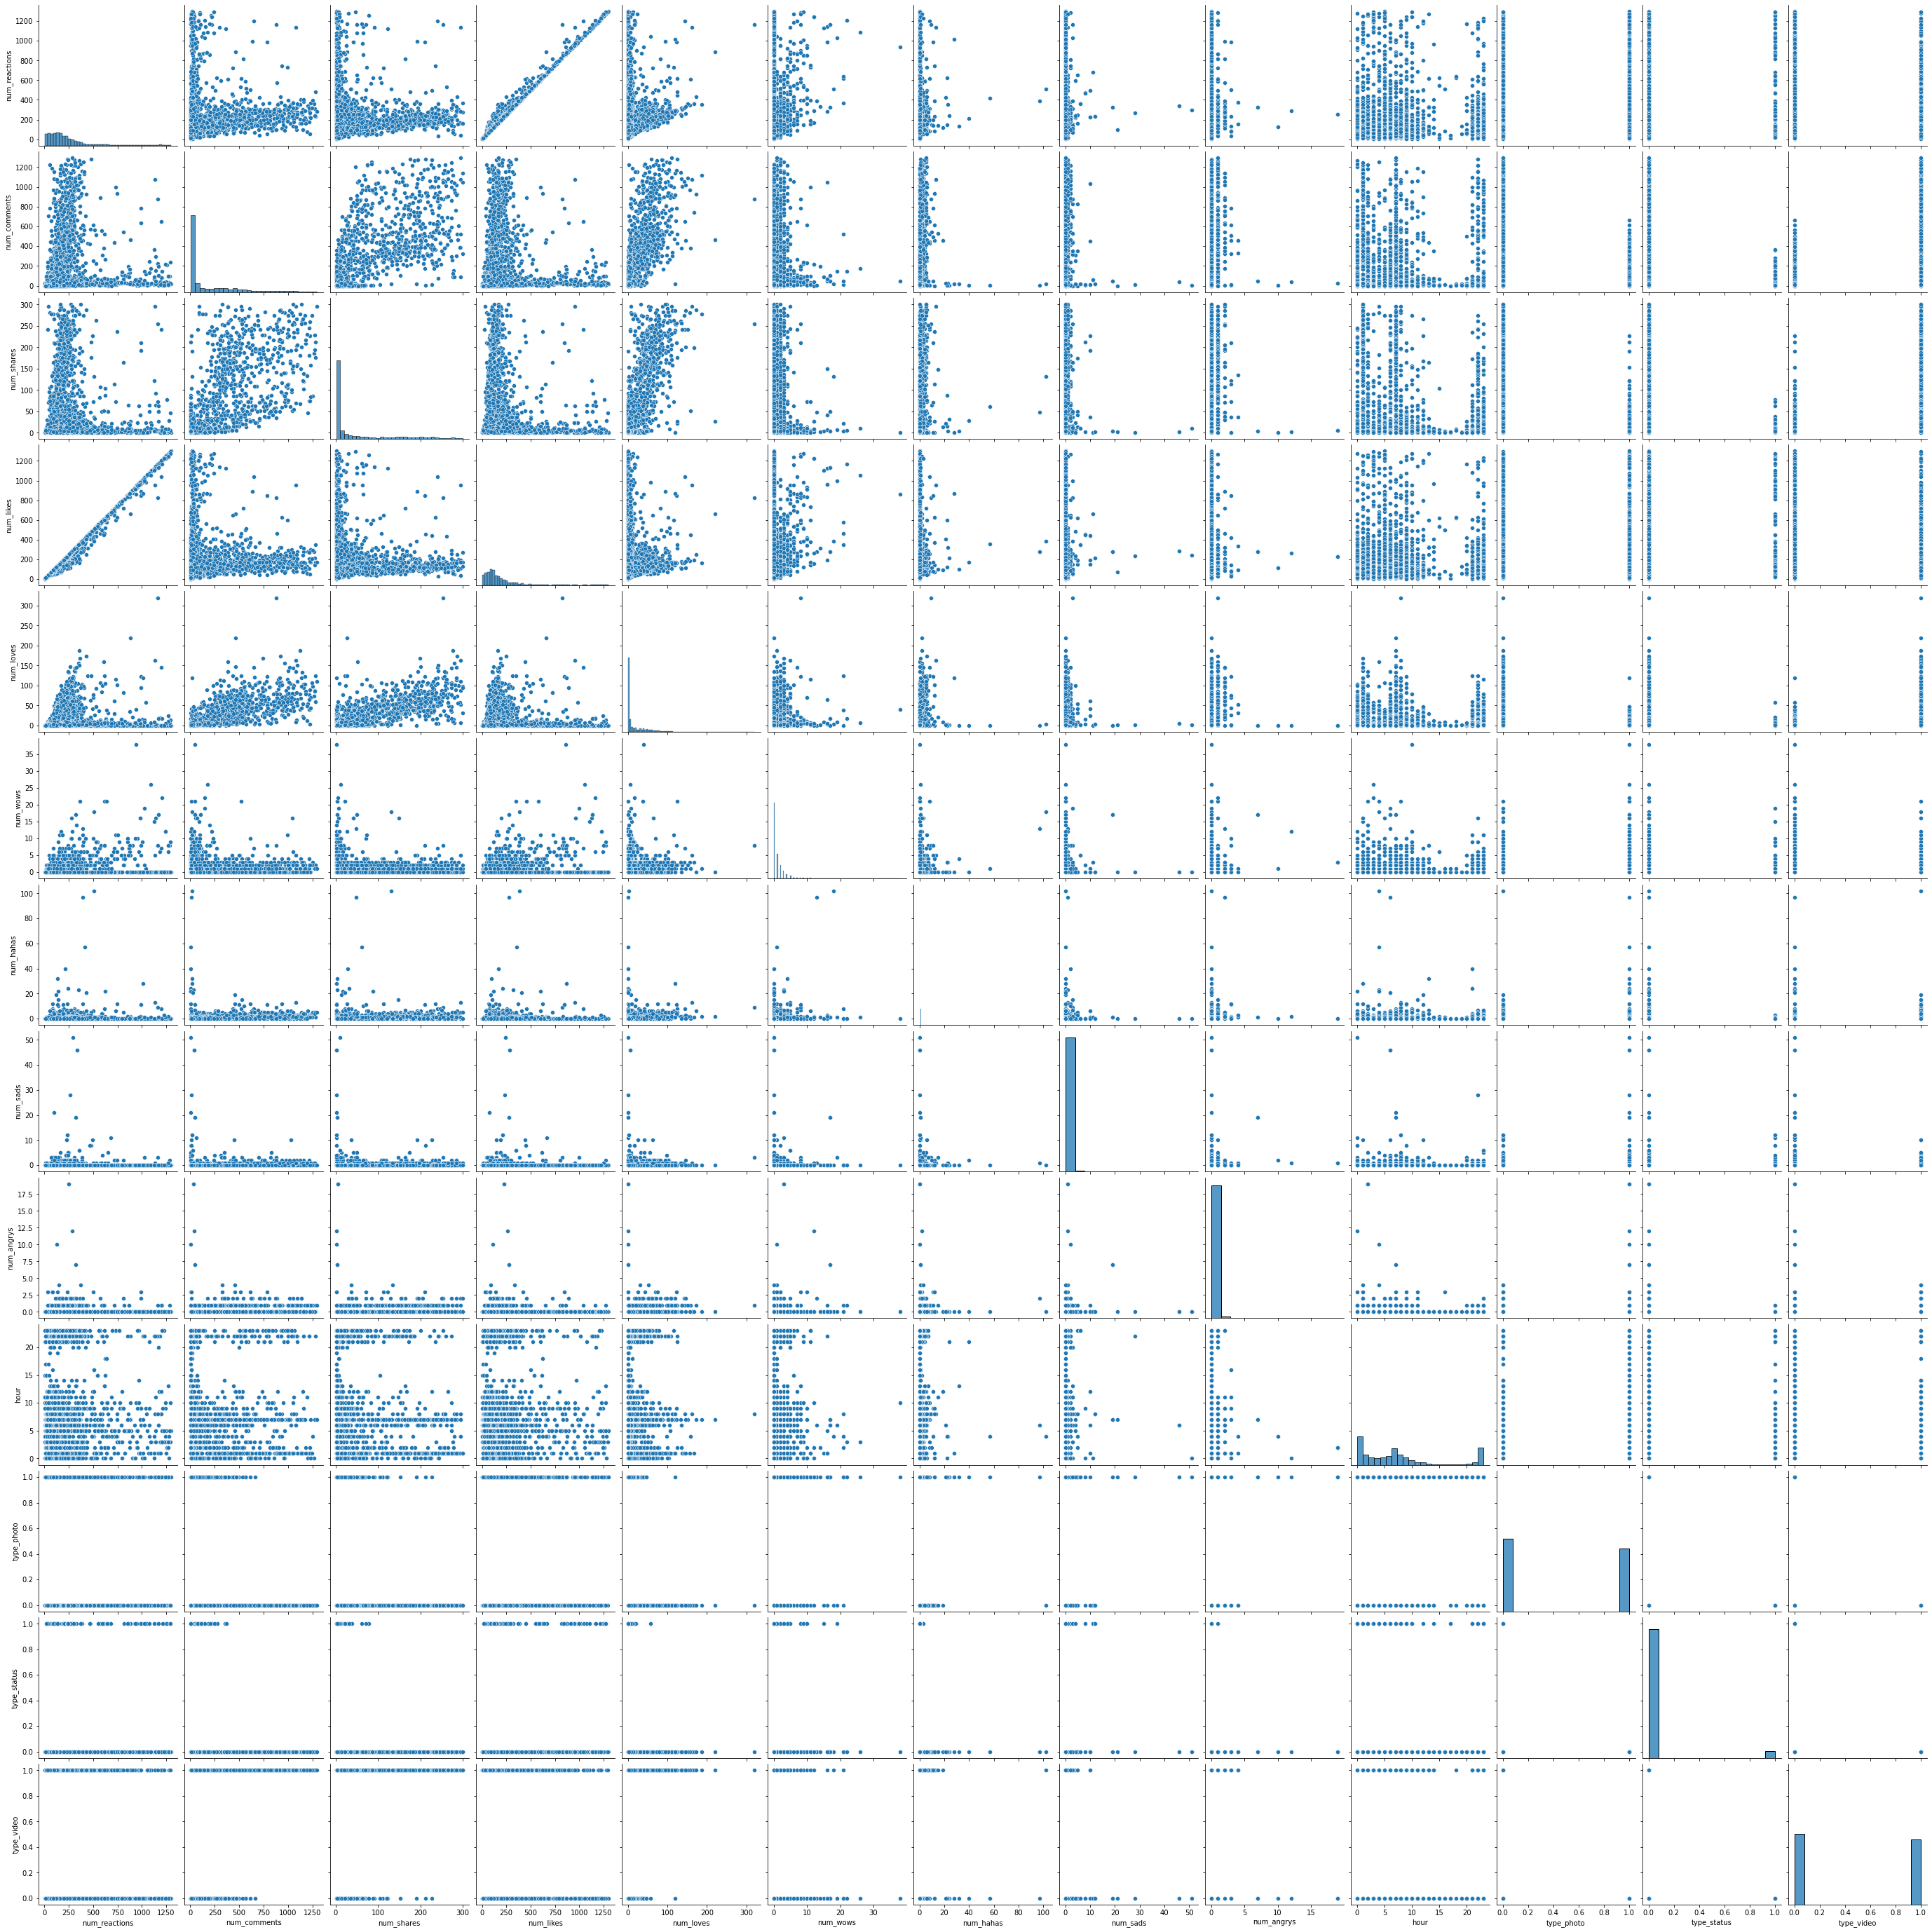

In [23]:
sns.pairplot(df2, height=3)

# STEP 6: check the dataframe with info() and make sure that all the columns are the numeric value

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2100 entries, 0 to 7048
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   num_reactions  2100 non-null   int64
 1   num_comments   2100 non-null   int64
 2   num_shares     2100 non-null   int64
 3   num_likes      2100 non-null   int64
 4   num_loves      2100 non-null   int64
 5   num_wows       2100 non-null   int64
 6   num_hahas      2100 non-null   int64
 7   num_sads       2100 non-null   int64
 8   num_angrys     2100 non-null   int64
 9   hour           2100 non-null   int64
 10  type_photo     2100 non-null   uint8
 11  type_status    2100 non-null   uint8
 12  type_video     2100 non-null   uint8
dtypes: int64(10), uint8(3)
memory usage: 251.2 KB


In [25]:
# backup data in csv
df2.to_csv('dataset/data_prepared.csv', index=False)

# STEP 7: Feature engineering (Early Step)
## Linear Regression Models with Feature Selection, Feature transformation and Scaling
This part, We will make linear regression model by applying different combination of feature selection, feature transformation and feature scaling methods

## 7.1 Variance Threshold Selection

In [26]:
# Assign X and y value
X = df2.drop(columns=["num_shares"])
y = df2.num_shares

from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=0.1)
vt.fit(X)
#VarianceThreshold(threshold=0.15)
pd.DataFrame({'variance': vt.variances_, 'select_feature': vt.get_support()}, index=X.columns).T

,num_reactions,num_comments,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,hour,type_photo,type_status,type_video
variance,63961.324228,88598.363482,63000.719478,892.379442,6.675195,15.810724,4.801406,0.647211,49.132204,0.248758,0.047071,0.249541
select_feature,True,True,True,True,True,True,True,True,True,True,False,True


In [27]:
df_vt = X.iloc[:,vt.get_support()]
print(df_vt.shape)
df_vt.head()

(2100, 11)


,num_reactions,num_comments,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,hour,type_photo,type_video
0,529,512,432,92,3,1,1,0,6,0,1
2,227,236,204,21,1,1,0,0,6,0,1
6,503,614,418,70,10,2,0,3,0,0,1
7,295,453,260,32,1,1,0,1,7,0,1
9,170,9,167,3,0,0,0,0,4,1,0


## 7.2 Select K-Best method

In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
kbest = SelectKBest(score_func=f_classif, k=11)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kbest.fit_transform(X_train, y_train)
df_selKBest = X.iloc[:,kbest.get_support()]
df_selKBest

,num_reactions,num_comments,num_likes,num_loves,num_wows,num_hahas,num_angrys,hour,type_photo,type_status,type_video
0,529,512,432,92,3,1,0,6,0,0,1
2,227,236,204,21,1,1,0,6,0,0,1
6,503,614,418,70,10,2,3,0,0,0,1
7,295,453,260,32,1,1,1,7,0,0,1
9,170,9,167,3,0,0,0,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7025,11,1,11,0,0,0,0,22,1,0,0
7030,91,2,91,0,0,0,0,22,1,0,0
7040,93,26,90,3,0,0,0,13,1,0,0
7043,196,2,195,1,0,0,0,5,1,0,0


## 7.3 Linear Regression model
### 7.3.1 initiate some lists to store the resault

In [29]:
fsel_list = []
ftrans_list = []
fscal_list = []
r2_scores = []
rmse_scores = []

### 7.3.2 define the function

In [30]:
# define function
def linear_regression(X, y, sel, trans, scal, chk=False):
    X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X, y, test_size=0.25, random_state=42)
    model1 = make_pipeline(
        LinearRegression()
    )
    model1.fit(X_test_1, Y_test_1)
    y_test_pred_1 = model1.predict(X_test_1) 

    r2_1 = r2_score(Y_test_1, y_test_pred_1)
    rmse_1 = np.sqrt(mean_squared_error(Y_test_1, y_test_pred_1))
    assign_value_and_print(sel, trans, scal, r2_1, rmse_1)
    if chk == True:
        return Y_test_1, y_test_pred_1
    
def linear_regression_with_minmax_scaler(X, y, sel, trans, scal, chk=False):
    X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(X, y, test_size=0.25, random_state=42)
    model3 = make_pipeline(
        MinMaxScaler(),  
        LinearRegression()
    )
    model3.fit(X_test_3, Y_test_3)  # apply scaling on training data
    y_test_pred_3 = model3.predict(X_test_3) 

    r2_3 = r2_score(Y_test_3, y_test_pred_3)
    rmse_3 = np.sqrt(mean_squared_error(Y_test_3, y_test_pred_3))

    assign_value_and_print(sel, trans, scal, r2_3, rmse_3)
    if chk == True:
        return Y_test_3, y_test_pred_3
    
def assign_value_and_print(sel, trans, scal, r2, rmse):
    
    print('R2 score = {:.2f}'.format(r2))
    print('RMSE score = {:.2f}'.format(rmse))
    print()

    fsel_list.append(sel)
    ftrans_list.append(trans)
    fscal_list.append(scal)
    r2_scores.append(r2)
    rmse_scores.append(rmse)

### 7.3.3 Linear Regression model with the Correlation based selected features

In [31]:
#Linear regression model
print("Linear regression model")
linear_regression(X, y, "Correlation Based", "None", "None")

Linear regression model
R2 score = 0.70
RMSE score = 42.56



### 7.3.5 Linear Regression model with Correlation based selected features and a feature scaling method

In [32]:
#Linear regression model with MinMax Scaler
print("Linear regression model with MinMax Scaler")
linear_regression_with_minmax_scaler(X,y, "Correlation Based", "None", "MinMax")

Linear regression model with MinMax Scaler
R2 score = 0.70
RMSE score = 42.56



### 7.3.7  Linear Regression model with Variance Threshold Selection

In [33]:
#Linear regression model
print("Linear regression model")
linear_regression(df_vt, y, "VT", "None", "None")

#Linear regression model with MinMax Scaler
print("Linear regression model with MinMax Scaler")
linear_regression_with_minmax_scaler(df_vt,y, "VT", "None", "MinMax")


Linear regression model
R2 score = 0.70
RMSE score = 42.57

Linear regression model with MinMax Scaler
R2 score = 0.70
RMSE score = 42.57



### 7.3.8 Linear Regression model with Select KBest Selection

In [34]:
#Linear regression model
print("Linear regression model")
linear_regression(df_selKBest, y, "SelectKBest", "None", "None")

#Linear regression model with MinMax Scaler
print("Linear regression model with MinMax Scaler")
linear_regression_with_minmax_scaler(df_selKBest,y, "SelectKBest", "None", "MinMax")

Linear regression model
R2 score = 0.70
RMSE score = 42.56

Linear regression model with MinMax Scaler
R2 score = 0.70
RMSE score = 42.56



# STEP 8: Feature engineering (Final Step)

The various regression model technique consisting:
- MinMaxScaler
- selectFromModel feature selection with RandomForest as the estimator
- polynomial transformation with degree 2
- Regression model
- LinearRegression
- SGDRegressor
- RandomForestRegressor
- DecisionTreeRegressor
- GradientBoostingRegressor
- AdaBoostRegressor
- XGBRegressor
- CatBoostRegressor
- MLPClassifier

In [35]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_classif
from sklearn.neural_network import MLPClassifier

/Users/maxllxam/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## 8.1 implement the pipeline

In [36]:
def run_pipeline(isPloy):
    if(isPloy):
        pipe = Pipeline([
                ('scaler', scaler), 
                ("selector",selecter),
                ('poly',PolynomialFeatures(degree=2, include_bias=True)),
                ('regressor',model)
            ])
        pipe.fit(X_train,y_train)
        y_pred = pipe.predict(X_test)
        names.append(model.__class__.__name__)
        scaler_name.append(scaler.__class__.__name__)
        selecter_name.append(selecter.__class__.__name__)
        r2.append(pipe.score(X_test,y_test))
        transform_name.append("None")
        rmse.append(mean_squared_error(y_test,y_pred, squared=False))
    else:
        pipe = Pipeline([
                ('scaler', scaler), 
                ("selector",selecter),
                ('regressor',model)
            ])
        pipe.fit(X_train,y_train)
        y_pred = pipe.predict(X_test)
        names.append(model.__class__.__name__)
        scaler_name.append(scaler.__class__.__name__)
        selecter_name.append(selecter.__class__.__name__)
        transform_name.append("Poly 2")
        r2.append(pipe.score(X_test,y_test))
        rmse.append(mean_squared_error(y_test,y_pred, squared=False))

In [37]:
models = []
r2 = []
rmse = []
names = []
scaler_name = []
selecter_name = []
transform_name = []

X = df2.drop(columns=["num_shares"])
y = df2.num_shares

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

models = [
    LinearRegression(), 
    SGDRegressor(), 
    RandomForestRegressor(n_estimators=10, max_depth=3),
    DecisionTreeRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor(),
    XGBRegressor(), 
    CatBoostRegressor(iterations=10, depth=3),
    MLPClassifier(learning_rate='adaptive', max_iter=1000, hidden_layer_sizes=(4,2))
]

scalers = [
    RobustScaler(),
    StandardScaler(),
    MinMaxScaler()
]

selecters = [
    SelectFromModel(estimator=RandomForestRegressor()),
    VarianceThreshold(threshold=0.1),
    SelectKBest(score_func=f_classif, k=11)
]


for scaler in scalers:
    for selecter in selecters:
        for model in models:
            run_pipeline(True)
            run_pipeline(False)
    
res_df = pd.DataFrame(zip(names,scaler_name,selecter_name,transform_name,r2,rmse),columns=['Regressors','Scalers','Selecters','Feature Transformation','R2 score','RMSE'])
res_df

Learning rate set to 0.5
0:	learn: 54.4280402	total: 61.6ms	remaining: 555ms
1:	learn: 44.7554385	total: 62.2ms	remaining: 249ms
2:	learn: 40.6335300	total: 62.7ms	remaining: 146ms
3:	learn: 38.7480583	total: 63.3ms	remaining: 95ms
4:	learn: 38.0031922	total: 63.8ms	remaining: 63.8ms
5:	learn: 37.3485594	total: 64.2ms	remaining: 42.8ms
6:	learn: 36.9000776	total: 64.7ms	remaining: 27.7ms
7:	learn: 36.3862110	total: 65.1ms	remaining: 16.3ms
8:	learn: 36.1294460	total: 65.5ms	remaining: 7.28ms
9:	learn: 36.0465179	total: 66ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 55.2169964	total: 365us	remaining: 3.29ms
1:	learn: 45.6055932	total: 737us	remaining: 2.95ms
2:	learn: 41.1170803	total: 1.04ms	remaining: 2.43ms
3:	learn: 39.4354626	total: 1.34ms	remaining: 2.01ms
4:	learn: 38.6349384	total: 1.71ms	remaining: 1.71ms
5:	learn: 38.0453139	total: 2.02ms	remaining: 1.34ms
6:	learn: 37.6497341	total: 2.35ms	remaining: 1.01ms
7:	learn: 37.1582841	total: 2.65ms	remaining: 662us
8:	learn:

/Users/maxllxam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/maxllxam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate set to 0.5
0:	learn: 54.8732807	total: 1.64ms	remaining: 14.8ms
1:	learn: 45.4150545	total: 2.73ms	remaining: 10.9ms
2:	learn: 40.7200486	total: 3.65ms	remaining: 8.51ms
3:	learn: 39.3692998	total: 4.53ms	remaining: 6.8ms
4:	learn: 38.2274397	total: 5.61ms	remaining: 5.61ms
5:	learn: 37.4771308	total: 6.74ms	remaining: 4.49ms
6:	learn: 36.4262765	total: 7.66ms	remaining: 3.28ms
7:	learn: 36.2325792	total: 8.58ms	remaining: 2.15ms
8:	learn: 35.8314779	total: 9.54ms	remaining: 1.06ms
9:	learn: 35.4597006	total: 10.4ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 53.7836543	total: 463us	remaining: 4.17ms
1:	learn: 44.3066231	total: 1.12ms	remaining: 4.49ms
2:	learn: 41.4512097	total: 1.66ms	remaining: 3.88ms
3:	learn: 39.2912137	total: 2.19ms	remaining: 3.29ms
4:	learn: 38.5334618	total: 2.78ms	remaining: 2.78ms
5:	learn: 38.1541028	total: 3.15ms	remaining: 2.1ms
6:	learn: 37.5716994	total: 3.54ms	remaining: 1.52ms
7:	learn: 37.3781179	total: 3.88ms	remaining: 970us
8:	

/Users/maxllxam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate set to 0.5
0:	learn: 53.2356820	total: 867us	remaining: 7.81ms
1:	learn: 44.0698325	total: 1.88ms	remaining: 7.5ms
2:	learn: 40.3215179	total: 2.72ms	remaining: 6.34ms
3:	learn: 38.4118660	total: 3.77ms	remaining: 5.66ms
4:	learn: 37.5055619	total: 4.69ms	remaining: 4.69ms
5:	learn: 36.7962015	total: 5.6ms	remaining: 3.73ms
6:	learn: 36.4563987	total: 6.56ms	remaining: 2.81ms
7:	learn: 36.2344268	total: 7.52ms	remaining: 1.88ms
8:	learn: 36.0744427	total: 8.49ms	remaining: 943us
9:	learn: 35.7478228	total: 9.4ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 54.7924308	total: 545us	remaining: 4.91ms
1:	learn: 45.4415785	total: 1.02ms	remaining: 4.07ms
2:	learn: 41.9257303	total: 1.46ms	remaining: 3.41ms
3:	learn: 39.6421098	total: 1.97ms	remaining: 2.96ms
4:	learn: 38.6159679	total: 2.42ms	remaining: 2.42ms
5:	learn: 38.1148526	total: 2.81ms	remaining: 1.87ms
6:	learn: 37.9467526	total: 3.24ms	remaining: 1.39ms
7:	learn: 37.7429103	total: 3.67ms	remaining: 918us
8:	lea

/Users/maxllxam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate set to 0.5
0:	learn: 53.7036295	total: 538us	remaining: 4.85ms
1:	learn: 45.0517256	total: 1.13ms	remaining: 4.53ms
2:	learn: 40.2847363	total: 1.73ms	remaining: 4.03ms
3:	learn: 38.6564574	total: 2.21ms	remaining: 3.31ms
4:	learn: 38.1796647	total: 2.63ms	remaining: 2.63ms
5:	learn: 37.8564205	total: 3.07ms	remaining: 2.04ms
6:	learn: 37.5609763	total: 3.5ms	remaining: 1.5ms
7:	learn: 36.9019918	total: 4ms	remaining: 999us
8:	learn: 36.5452173	total: 4.47ms	remaining: 496us
9:	learn: 36.2175288	total: 4.91ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 55.2169964	total: 426us	remaining: 3.84ms
1:	learn: 45.6055932	total: 901us	remaining: 3.6ms
2:	learn: 41.1170803	total: 1.35ms	remaining: 3.16ms
3:	learn: 39.4354626	total: 1.77ms	remaining: 2.65ms
4:	learn: 38.6349384	total: 2.1ms	remaining: 2.1ms
5:	learn: 38.0453139	total: 2.44ms	remaining: 1.63ms
6:	learn: 37.6497341	total: 2.81ms	remaining: 1.2ms
7:	learn: 37.1582841	total: 3.18ms	remaining: 795us
8:	learn: 36.9

/Users/maxllxam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/maxllxam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate set to 0.5
0:	learn: 56.0448754	total: 1.82ms	remaining: 16.4ms
1:	learn: 45.1711138	total: 3.05ms	remaining: 12.2ms
2:	learn: 41.3523570	total: 4.07ms	remaining: 9.49ms
3:	learn: 39.3306576	total: 5.19ms	remaining: 7.79ms
4:	learn: 38.6952543	total: 6.16ms	remaining: 6.16ms
5:	learn: 38.6086152	total: 7.2ms	remaining: 4.8ms
6:	learn: 37.6881585	total: 8.17ms	remaining: 3.5ms
7:	learn: 37.4056768	total: 9.31ms	remaining: 2.33ms
8:	learn: 37.2052103	total: 10.4ms	remaining: 1.15ms
9:	learn: 36.9547077	total: 11.4ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 52.9343016	total: 462us	remaining: 4.16ms
1:	learn: 43.9335280	total: 949us	remaining: 3.8ms
2:	learn: 40.5680311	total: 1.47ms	remaining: 3.44ms
3:	learn: 38.6872553	total: 2.12ms	remaining: 3.19ms
4:	learn: 38.0135673	total: 2.58ms	remaining: 2.58ms
5:	learn: 37.4871557	total: 3.04ms	remaining: 2.03ms
6:	learn: 37.1986219	total: 3.51ms	remaining: 1.5ms
7:	learn: 36.8566265	total: 3.98ms	remaining: 995us
8:	lear

/Users/maxllxam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/maxllxam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate set to 0.5
0:	learn: 53.5892735	total: 926us	remaining: 8.34ms
1:	learn: 44.7271458	total: 1.82ms	remaining: 7.27ms
2:	learn: 41.0339957	total: 2.69ms	remaining: 6.28ms
3:	learn: 38.6904857	total: 3.83ms	remaining: 5.75ms
4:	learn: 37.9416992	total: 4.76ms	remaining: 4.76ms
5:	learn: 37.0577053	total: 5.96ms	remaining: 3.97ms
6:	learn: 36.7132781	total: 6.78ms	remaining: 2.9ms
7:	learn: 36.3279669	total: 8.01ms	remaining: 2ms
8:	learn: 36.0196913	total: 8.92ms	remaining: 990us
9:	learn: 35.8373735	total: 9.83ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 54.7924308	total: 454us	remaining: 4.09ms
1:	learn: 45.4415785	total: 1.04ms	remaining: 4.18ms
2:	learn: 41.9257303	total: 1.67ms	remaining: 3.89ms
3:	learn: 39.6421098	total: 2.35ms	remaining: 3.53ms
4:	learn: 38.6159679	total: 3.06ms	remaining: 3.06ms
5:	learn: 38.1148526	total: 3.47ms	remaining: 2.31ms
6:	learn: 37.9467526	total: 3.86ms	remaining: 1.66ms
7:	learn: 37.7429103	total: 4.41ms	remaining: 1.1ms
8:	lear

/Users/maxllxam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate set to 0.5
0:	learn: 54.6332800	total: 584us	remaining: 5.26ms
1:	learn: 45.0116313	total: 1.22ms	remaining: 4.87ms
2:	learn: 40.9805247	total: 1.85ms	remaining: 4.33ms
3:	learn: 39.3190651	total: 2.43ms	remaining: 3.65ms
4:	learn: 38.6628162	total: 2.95ms	remaining: 2.95ms
5:	learn: 37.8769667	total: 3.45ms	remaining: 2.3ms
6:	learn: 37.6338969	total: 4.15ms	remaining: 1.78ms
7:	learn: 37.3947147	total: 4.77ms	remaining: 1.19ms
8:	learn: 36.9803682	total: 5.88ms	remaining: 653us
9:	learn: 36.6783439	total: 6.36ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 55.2169964	total: 687us	remaining: 6.19ms
1:	learn: 45.6055932	total: 1.1ms	remaining: 4.4ms
2:	learn: 41.1170803	total: 1.5ms	remaining: 3.51ms
3:	learn: 39.4354626	total: 1.85ms	remaining: 2.78ms
4:	learn: 38.6349384	total: 2.27ms	remaining: 2.27ms
5:	learn: 38.0453139	total: 2.76ms	remaining: 1.84ms
6:	learn: 37.6497341	total: 3.22ms	remaining: 1.38ms
7:	learn: 37.1582841	total: 3.57ms	remaining: 891us
8:	lear

/Users/maxllxam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/maxllxam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate set to 0.5
0:	learn: 66.2863805	total: 308us	remaining: 2.77ms
1:	learn: 63.6043990	total: 666us	remaining: 2.66ms
2:	learn: 62.9081752	total: 1.1ms	remaining: 2.57ms
3:	learn: 62.7684673	total: 1.38ms	remaining: 2.06ms
4:	learn: 62.7040535	total: 1.64ms	remaining: 1.64ms
5:	learn: 62.6794174	total: 1.95ms	remaining: 1.3ms
6:	learn: 62.6780647	total: 2.21ms	remaining: 947us
7:	learn: 62.6726681	total: 2.51ms	remaining: 626us
8:	learn: 62.6712446	total: 2.83ms	remaining: 315us
9:	learn: 62.6712249	total: 3.15ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 66.2745113	total: 414us	remaining: 3.73ms
1:	learn: 63.5984978	total: 873us	remaining: 3.49ms
2:	learn: 62.9067301	total: 1.16ms	remaining: 2.71ms
3:	learn: 62.7305330	total: 1.47ms	remaining: 2.21ms
4:	learn: 62.6858742	total: 1.8ms	remaining: 1.8ms
5:	learn: 62.6772003	total: 2ms	remaining: 1.33ms
6:	learn: 62.6723953	total: 2.26ms	remaining: 969us
7:	learn: 62.6711612	total: 2.58ms	remaining: 644us
8:	learn: 62.67

/Users/maxllxam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/maxllxam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


,Regressors,Scalers,Selecters,Feature Transformation,R2 score,RMSE
0,LinearRegression,RobustScaler,SelectFromModel,None,0.713779,41.300964
1,LinearRegression,RobustScaler,SelectFromModel,Poly 2,0.665758,44.631357
2,SGDRegressor,RobustScaler,SelectFromModel,None,0.648314,45.781213
3,SGDRegressor,RobustScaler,SelectFromModel,Poly 2,0.666208,44.601314
4,RandomForestRegressor,RobustScaler,SelectFromModel,None,0.754934,38.216547
...,...,...,...,...,...,...
157,XGBRegressor,MinMaxScaler,SelectKBest,Poly 2,0.730590,40.069742
158,CatBoostRegressor,MinMaxScaler,SelectKBest,None,0.748691,38.700246
159,CatBoostRegressor,MinMaxScaler,SelectKBest,Poly 2,0.756596,38.086722
160,MLPClassifier,MinMaxScaler,SelectKBest,None,0.297143,61.554328


In [38]:
res_df.head(20)


,Regressors,Scalers,Selecters,Feature Transformation,R2 score,RMSE
0,LinearRegression,RobustScaler,SelectFromModel,None,0.713779,41.300964
1,LinearRegression,RobustScaler,SelectFromModel,Poly 2,0.665758,44.631357
2,SGDRegressor,RobustScaler,SelectFromModel,None,0.648314,45.781213
3,SGDRegressor,RobustScaler,SelectFromModel,Poly 2,0.666208,44.601314
4,RandomForestRegressor,RobustScaler,SelectFromModel,None,0.754934,38.216547
5,RandomForestRegressor,RobustScaler,SelectFromModel,Poly 2,0.756011,38.132496
6,DecisionTreeRegressor,RobustScaler,SelectFromModel,None,0.489697,55.147257
7,DecisionTreeRegressor,RobustScaler,SelectFromModel,Poly 2,0.536969,52.530889
8,GradientBoostingRegressor,RobustScaler,SelectFromModel,None,0.759151,37.886289
9,GradientBoostingRegressor,RobustScaler,SelectFromModel,Poly 2,0.774569,36.653581


In [39]:
#sorting the result
res_df.sort_values(by='R2 score',ascending=False).head(20)

,Regressors,Scalers,Selecters,Feature Transformation,R2 score,RMSE
80,GradientBoostingRegressor,StandardScaler,VarianceThreshold,None,0.784782,35.813687
62,GradientBoostingRegressor,StandardScaler,SelectFromModel,None,0.780452,36.172172
116,GradientBoostingRegressor,MinMaxScaler,SelectFromModel,None,0.779919,36.216010
98,GradientBoostingRegressor,StandardScaler,SelectKBest,None,0.778697,36.316488
27,GradientBoostingRegressor,RobustScaler,VarianceThreshold,Poly 2,0.777931,36.379211
81,GradientBoostingRegressor,StandardScaler,VarianceThreshold,Poly 2,0.777107,36.446660
26,GradientBoostingRegressor,RobustScaler,VarianceThreshold,None,0.775311,36.593234
9,GradientBoostingRegressor,RobustScaler,SelectFromModel,Poly 2,0.774569,36.653581
33,CatBoostRegressor,RobustScaler,VarianceThreshold,Poly 2,0.773740,36.720950
63,GradientBoostingRegressor,StandardScaler,SelectFromModel,Poly 2,0.773313,36.755550


### Based on predictive accuracy. the Gradient Boosting Regressor model is the best model with score is 0.78. followd by CatBoost Regressor model. 
### Therefore, we select the Gradient Boosting Regressor with 'StandardScaler' and 'VarianceThreshold' selecter for out-of-sample predictions.

## 8.2 Selecting the best feature selection

In [40]:

X = df2.drop(columns=["num_shares"])
y = df2.num_shares

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipe_selected = Pipeline([
                ('scaler', StandardScaler()), 
                ("selector",VarianceThreshold(threshold=0.1)),
                ('regressor',GradientBoostingRegressor())
            ])
pipe_selected.fit(X_train,y_train)
y_pred_selected = pipe_selected.predict(X_test)
print('R2 score = {:.2f}'.format(pipe_selected.score(X_test,y_test)))
print('RMSE score = {:.2f}'.format(mean_squared_error(y_test,y_pred_selected, squared=False)))

R2 score = 0.78
RMSE score = 34.98


# STEP 9: Report and Result Analysis

## 9.1 Plot the scatter plot

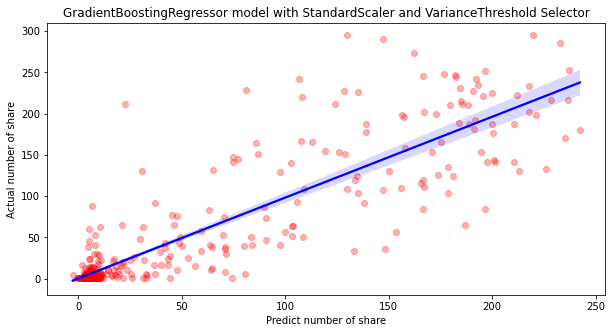

In [41]:
import seaborn as sns
fig, axes = plt.subplots(figsize=(10, 5), sharey=True)
sns.regplot(x=y_pred_selected, y=y_test, scatter_kws={"color": "red", "alpha": 0.3}, line_kws={"color": "blue"})
plt.title('GradientBoostingRegressor model with StandardScaler and VarianceThreshold Selector')
plt.xlabel('Predict number of share', fontsize=10)
plt.ylabel('Actual number of share', fontsize=10)
plt.show()

## 9.2 Results analysis

The results of the selected model can be plotted on a graph for the correlation between the actual data and the predicted data (shown below).
The trend of the chart is a position relation. which is quite accurate and consistent with the hypothesis and the accuracy score was 78%, Although, we still can see some errors as you can see from the graph. 

However, this model is effective and suitable to be used for project objective predictions.


# STEP 10: Out-of-Sample Prediction

The company would like to launch a new campaign on Facebook and They need to get reach as many as possible for this campaign. The number of customer engagement is the goal that can show whether this campaign is successful or not. 

Therefore, They would like to predict the total number of shares for this campaign with different types of Facebook's posts.

## 10.1 Out-of-sample data with below detail.

#### The company decided to launch a new campaign at 0:00 with a video format. which the company wants to predict the number of shares of this campaign. 

#### The company will rely on some data from past similar campaigns to predict the number of shares of this campaign such as the number of likes, and the number of responses. To know if the campaign will be successful or not and present it to the executives in charge of the project.

In [42]:
df2.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,hour,type_photo,type_status,type_video
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,241.920952,197.124762,48.026667,221.022857,18.270952,1.270000,0.906190,0.304762,0.142857,7.670952,0.464762,0.049524,0.478571
std,252.965999,297.725668,76.299835,251.059224,29.879836,2.584255,3.977217,2.191733,0.804686,7.011106,0.498876,0.217011,0.499660
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,21.000000,1.000000,1.000000,20.950000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,88.000000,6.000000,1.000000,77.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,168.000000,27.000000,5.000000,132.500000,3.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000
75%,285.250000,323.250000,62.000000,250.000000,27.000000,2.000000,1.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000
95%,867.300000,914.050000,230.000000,849.250000,80.000000,5.000000,4.000000,1.000000,1.000000,23.000000,1.000000,0.000000,1.000000
max,1300.000000,1293.000000,300.000000,1300.000000,320.000000,38.000000,102.000000,51.000000,19.000000,23.000000,1.000000,1.000000,1.000000


## 10.2 Sample1 with simple values. (reaction, comment, like, etc.)

In [43]:
sample1 = pd.DataFrame({
    'num_reactions':[168],
    'num_comments':[27],
    'num_likes':[166],
    'num_loves':[3],
    'num_wows':[1],
    'num_hahas':[1],
    'num_sads':[0],
    'num_angrys':[0],
    'hour':[0],
    'type_photo':[False],
    'type_status':[False],
    'type_video':[True],
})

y_pred_sample1 = pipe_selected.predict(sample1)
y_pred_sample1

array([10.18132407])

#### The Facebook post's share prediction result for sample1 is 10 shares.

## 10.3 Sample2 with heigh values. (reaction, comment, like, etc.)

In [44]:
sample2 = pd.DataFrame({
    'num_reactions':[240],
    'num_comments':[197],
    'num_likes':[220],
    'num_loves':[18],
    'num_wows':[1],
    'num_hahas':[1],
    'num_sads':[0],
    'num_angrys':[0],
    'hour':[0],
    'type_photo':[False],
    'type_status':[False],
    'type_video':[True],
})

y_pred_sample2 = pipe_selected.predict(sample2)
y_pred_sample2

array([49.5081149])

#### The Facebook post's share prediction result for sample2 is 50 shares.

## 10.4 Sample3 with extream values. (reaction, comment, like, etc.)

In [45]:
sample3 = pd.DataFrame({
    'num_reactions':[1300],
    'num_comments':[1290],
    'num_likes':[1150],
    'num_loves':[140],
    'num_wows':[5],
    'num_hahas':[4],
    'num_sads':[1],
    'num_angrys':[0],
    'hour':[0],
    'type_photo':[False],
    'type_status':[False],
    'type_video':[True],
})

y_pred_sample3 = pipe_selected.predict(sample3)
y_pred_sample3

array([210.64929662])

#### The Facebook post's share prediction result for sample3 is 211 shares.

### Regarding the relationship between the number of love reactions and the number of shares. If there are more love reactions, the number of shares will increase in the same reaction conditions This is a choice for the campaign content that the campaign should be presented in the form of love, warmth, and softness, to increase the customer's feelings to make it easy to understand what the campaign wants to convey. Therefore, the number of shares will increase as the prediction results below.

## 10.5 repredict with increase the number of love reactions

### 10.5.1 Sample1 with simple values. (increase the number of love reactions with 3 times)

In [46]:
sample1_inc_love = pd.DataFrame({
    'num_reactions':[168],
    'num_comments':[27],
    'num_likes':[136],
    'num_loves':[30],
    'num_wows':[1],
    'num_hahas':[1],
    'num_sads':[0],
    'num_angrys':[0],
    'hour':[0],
    'type_photo':[False],
    'type_status':[False],
    'type_video':[True],
})

y_pred_sample1_inc_love = pipe_selected.predict(sample1_inc_love)
y_pred_sample1_inc_love

array([66.3055937])

#### The Facebook post's share prediction result for sample1 is 66 shares instead of 10 shares.

### 10.5.2 Sample2 with heigh values. (increase the number of love reactions with 3 times)

In [47]:
sample2_inc_love = pd.DataFrame({
    'num_reactions':[240],
    'num_comments':[197],
    'num_likes':[178],
    'num_loves':[60],
    'num_wows':[1],
    'num_hahas':[1],
    'num_sads':[0],
    'num_angrys':[0],
    'hour':[0],
    'type_photo':[False],
    'type_status':[False],
    'type_video':[True],
})

y_pred_sample2_inc_love = pipe_selected.predict(sample2_inc_love)
y_pred_sample2_inc_love

array([132.91967968])

#### The Facebook post's share prediction result for sample2 is 133 shares instead of 44 shares.

## 10.4 Sample3 with extream values. (increase the number of love reactions with 2 times)

In [48]:
sample3_inc_love = pd.DataFrame({
    'num_reactions':[1300],
    'num_comments':[1290],
    'num_likes':[990],
    'num_loves':[300],
    'num_wows':[5],
    'num_hahas':[4],
    'num_sads':[1],
    'num_angrys':[0],
    'hour':[0],
    'type_photo':[False],
    'type_status':[False],
    'type_video':[True],
})

y_pred_sample3_inc_love = pipe_selected.predict(sample3_inc_love)
y_pred_sample3_inc_love

array([216.07670044])

#### The Facebook post's share prediction result for sample3 is 216 shares instead of 211 shares. 

Due to the training dataset having a limited number of loves (maximum is 320), the number of loves in sample 3 will not increase much as possible.